<a href="https://colab.research.google.com/github/Francisco2963/Precios-de-Veh-culos-Usados/blob/main/03_Modelos_basados_en_%C3%A1rbol_Predicci%C3%B3n_de_Precios_de_Veh%C3%ADculos_Usados_(Core).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# EDA

In [197]:
import pandas as pd


In [198]:
df = pd.read_csv('/content/vehicles.csv')
df.head()

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,...,size,type,paint_color,image_url,description,county,state,lat,long,posting_date
0,7222695916,https://prescott.craigslist.org/cto/d/prescott...,prescott,https://prescott.craigslist.org,6000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,az,NaN,NaN,NaN
1,7218891961,https://fayar.craigslist.org/ctd/d/bentonville...,fayetteville,https://fayar.craigslist.org,11900,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ar,NaN,NaN,NaN
2,7221797935,https://keys.craigslist.org/cto/d/summerland-k...,florida keys,https://keys.craigslist.org,21000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,fl,NaN,NaN,NaN
3,7222270760,https://worcester.craigslist.org/cto/d/west-br...,worcester / central MA,https://worcester.craigslist.org,1500,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ma,NaN,NaN,NaN
4,7210384030,https://greensboro.craigslist.org/cto/d/trinit...,greensboro,https://greensboro.craigslist.org,4900,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,nc,NaN,NaN,NaN


In [199]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 26 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   url           426880 non-null  object 
 2   region        426880 non-null  object 
 3   region_url    426880 non-null  object 
 4   price         426880 non-null  int64  
 5   year          425675 non-null  float64
 6   manufacturer  409234 non-null  object 
 7   model         421603 non-null  object 
 8   condition     252776 non-null  object 
 9   cylinders     249202 non-null  object 
 10  fuel          423867 non-null  object 
 11  odometer      422480 non-null  float64
 12  title_status  418638 non-null  object 
 13  transmission  424324 non-null  object 
 14  VIN           265838 non-null  object 
 15  drive         296313 non-null  object 
 16  size          120519 non-null  object 
 17  type          334022 non-null  object 
 18  pain

El archivo es muy grande, la memoria usada es de 84.7+ MB, crearemos un archivo mas pequeño con 10 mil muestras aleatorias de las 26 columnas del DataFrame

In [200]:
import pandas as pd
import random

In [201]:


# Crear un nuevo DataFrame vacío para almacenar las muestras
df_sample = pd.DataFrame()

# Iterar sobre cada columna y seleccionar 10,000 muestras aleatorias
for column in df.columns:
    sample = df[column].sample(n=10000, random_state=42)  # random_state para reproducibilidad
    df_sample[column] = sample

# Guardar el nuevo DataFrame como un archivo CSV
df_sample.to_csv('vehicles_sample.csv', index=False)

In [202]:
df_sample.head()

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,...,size,type,paint_color,image_url,description,county,state,lat,long,posting_date
100905,7315883828,https://lakeland.craigslist.org/ctd/d/lakeland...,lakeland,https://lakeland.craigslist.org,36990,2017.00,ford,f150 super cab lariat,good,6 cylinders,...,NaN,pickup,white,https://images.craigslist.org/00s0s_lRS7etJoVE...,Carvana is the safer way to buy a car During t...,NaN,fl,28.04,-81.96,2021-05-02T15:31:06-0400
143835,7314599643,https://quadcities.craigslist.org/ctd/d/waterl...,"quad cities, IA/IL",https://quadcities.craigslist.org,27995,2006.00,chevrolet,corvette,good,8 cylinders,...,NaN,convertible,black,https://images.craigslist.org/00101_aa4DyXpKu0...,2006 *** Chevrolet Corvette Convertible Conver...,NaN,il,42.48,-92.37,2021-04-29T18:46:35-0500
20235,7308399808,https://littlerock.craigslist.org/ctd/d/clinto...,little rock,https://littlerock.craigslist.org,78423,2015.00,chevrolet,corvette,NaN,8 cylinders,...,NaN,convertible,NaN,https://images.craigslist.org/00A0A_kJsL7mVMCg...,➔ Want to see more pictures?Paste this link to...,NaN,ar,38.40,-93.78,2021-04-17T14:01:33-0500
300734,7312663807,https://wheeling.craigslist.org/ctd/d/follansb...,northern panhandle,https://wheeling.craigslist.org,14000,2013.00,bmw,328i,NaN,NaN,...,NaN,NaN,NaN,https://images.craigslist.org/00K0K_2oCjTKrjd9...,"**Deals, Deals, Deals** Beautiful 2013 BMW 3-S...",NaN,oh,40.32,-80.62,2021-04-25T23:53:42-0400
316249,7315368523,https://eugene.craigslist.org/ctd/d/cottage-gr...,eugene,https://eugene.craigslist.org,676,2019.00,chevrolet,suburban ls,NaN,8 cylinders,...,NaN,NaN,black,https://images.craigslist.org/00H0H_3hFsa4lTxO...,2019 Chevrolet Suburban LS Brads Chevy - ☎️ ...,NaN,or,43.78,-123.05,2021-05-01T10:04:24-0700


In [203]:
df_sample.info()


<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 100905 to 251540
Data columns (total 26 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            10000 non-null  int64  
 1   url           10000 non-null  object 
 2   region        10000 non-null  object 
 3   region_url    10000 non-null  object 
 4   price         10000 non-null  int64  
 5   year          9974 non-null   float64
 6   manufacturer  9611 non-null   object 
 7   model         9888 non-null   object 
 8   condition     5958 non-null   object 
 9   cylinders     5824 non-null   object 
 10  fuel          9916 non-null   object 
 11  odometer      9896 non-null   float64
 12  title_status  9788 non-null   object 
 13  transmission  9942 non-null   object 
 14  VIN           6205 non-null   object 
 15  drive         6990 non-null   object 
 16  size          2805 non-null   object 
 17  type          7884 non-null   object 
 18  paint_color   7010 non-nu

In [204]:
df_sample = df_sample.reset_index(drop=True)

In [205]:
df_sample.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 26 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            10000 non-null  int64  
 1   url           10000 non-null  object 
 2   region        10000 non-null  object 
 3   region_url    10000 non-null  object 
 4   price         10000 non-null  int64  
 5   year          9974 non-null   float64
 6   manufacturer  9611 non-null   object 
 7   model         9888 non-null   object 
 8   condition     5958 non-null   object 
 9   cylinders     5824 non-null   object 
 10  fuel          9916 non-null   object 
 11  odometer      9896 non-null   float64
 12  title_status  9788 non-null   object 
 13  transmission  9942 non-null   object 
 14  VIN           6205 non-null   object 
 15  drive         6990 non-null   object 
 16  size          2805 non-null   object 
 17  type          7884 non-null   object 
 18  paint_color   7010 non-null

In [206]:
#ELIMINAR COLUMNAS QUE NO APORTAN  AL MODELO
df_sample = df_sample.drop(['image_url','county','id','url','region_url'], axis=1)
df_sample = df_sample.reset_index(drop=True)
df_sample.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 21 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   region        10000 non-null  object 
 1   price         10000 non-null  int64  
 2   year          9974 non-null   float64
 3   manufacturer  9611 non-null   object 
 4   model         9888 non-null   object 
 5   condition     5958 non-null   object 
 6   cylinders     5824 non-null   object 
 7   fuel          9916 non-null   object 
 8   odometer      9896 non-null   float64
 9   title_status  9788 non-null   object 
 10  transmission  9942 non-null   object 
 11  VIN           6205 non-null   object 
 12  drive         6990 non-null   object 
 13  size          2805 non-null   object 
 14  type          7884 non-null   object 
 15  paint_color   7010 non-null   object 
 16  description   10000 non-null  object 
 17  state         10000 non-null  object 
 18  lat           9843 non-null

In [207]:
df_sample.duplicated().sum()

0

In [208]:
df_sample.describe()

,price,year,odometer,lat,long
count,10000.00,9974.00,9896.00,9843.00,9843.00
mean,17968.95,2011.35,101767.33,38.42,-94.74
std,24946.87,9.18,279643.86,5.75,18.16
min,0.00,1903.00,0.00,-25.26,-159.37
25%,5995.00,2008.00,37877.25,34.27,-111.93
50%,13987.50,2013.00,86444.00,39.12,-88.61
75%,26590.00,2017.00,135000.00,42.33,-80.88
max,1234567.00,2022.00,10000000.00,64.84,36.08


In [209]:
#PRECIO
pd.set_option('display.float_format', '{:.2f}'.format)
df_sample.describe().round(2)

# tenemos un precio por sobre el millon de dolares, que auto sera????

,price,year,odometer,lat,long
count,10000.00,9974.00,9896.00,9843.00,9843.00
mean,17968.95,2011.35,101767.33,38.42,-94.74
std,24946.87,9.18,279643.86,5.75,18.16
min,0.00,1903.00,0.00,-25.26,-159.37
25%,5995.00,2008.00,37877.25,34.27,-111.93
50%,13987.50,2013.00,86444.00,39.12,-88.61
75%,26590.00,2017.00,135000.00,42.33,-80.88
max,1234567.00,2022.00,10000000.00,64.84,36.08


COMENTARIO

Buscaremos el valor de ese vehiculo que supera el millon de dolares para ver si se trata de un valor outliers o no

In [210]:
# Filtramos las filas donde el precio es mayor a 1 millón
auto_caro = df_sample.loc[df_sample['price'] >= 1000000]

# Imprimimos la información del auto
auto_caro

,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,...,VIN,drive,size,type,paint_color,description,state,lat,long,posting_date
153,southwest MS,1111111,1970.00,dodge,challenger,fair,8 cylinders,gas,42000.00,clean,...,NaN,rwd,full-size,coupe,blue,"Selling collection , 30 restored or super clea...",ms,47.51,-111.27,2021-04-11T19:04:00-0500
300,terre haute,1234567,2006.00,jeep,wrangler,like new,6 cylinders,gas,123456.00,clean,...,NaN,4wd,mid-size,SUV,custom,"Top shelf jeeps, have around 25 in stock, Onl...",in,38.03,-87.60,2021-04-18T11:26:55-0400
3435,delaware,1000000,2022.00,NaN,Any make any model,NaN,NaN,other,364747.00,clean,...,NaN,NaN,NaN,NaN,NaN,We come to you and give you an easy quick tran...,de,39.57,-75.60,2021-04-19T09:55:42-0400


In [211]:
df_sample.loc[153, 'description']

'Selling collection , 30 restored or super clean untouched low mile old cars and 250 plus field cars trucks and tractors.  These are in Montana. See 24 here or visit my website by googling montana-solid-iron . Delivery avail by national  carriers or will hold for pickup.'

In [212]:
df_sample.loc[300, 'description']

'Top shelf jeeps,  have around 25 in stock, Only carry the best of the best jeeps,  www.gracemotorsllc.com or call 812-454-4624  No haggle price on all jeeps.  I am a cash only dealer or bring a cashier check during banking hours.'

In [213]:
df_sample.loc[3435, 'description']

'We come to you and give you an easy quick transaction. No dealing with shady dealers and time wasters. Cash in hand today for your vehicle. We buy any make any model. Any year. Classic or modern. Nothing to old or to cheap or to new and expensive. Give us a call or shoot us a text with info- pictures miles and vin and instantly receive a offer. Thanks  No problem if it’s leased or financed. Call us now     Bmw m3 m5 m5 750 x1 x2 x3 x4 x5 x6 x7 mpackage m Sport Sport Package x drive Mercedes Benz c300 c63 e350 4 matic e63 s550 s63 Lexus Audi Lamborghini Ferrari Porsche 911 Turbo boxster cayman cayenne Macan 914 Tesla corvette mustang challenger Ford dodge corvette ram international scout f150 f250 f350 lariat xlt platinum limited king ranch diesel dually 2500 1500 3500 rolls Royce Bentley Aston Martin McLaren Mini Cooper Chrysler scat pack hemi 6.4 6.1 srt srt8 hellcat grand Cherokee classic cars'

COMENTARIO

Los precios por sobre el millon de dolares son valores errados, ya que no puede ser que un jeep wrangler del año 2006 sea el vehiculo mas caro de todo el DataFrame.

Las descripciones de los 3 valores hablan de distribuidores de autos, por lo tanto no es una publicacion de un auto en especifico, por lo tanto sus valores elevados por sobre el millon de dolares no corresponde para una publicacion sobre un concesionario que vende que esta vendiendo mas de un auto, por ejemplo para la descripcion del Dodge Challender de 1970 en EEUU el precio de uno de estos autos es de 200.000 mil dolares segun fuentes de internet, el problema es que no hya ninguno a la venta.

Analizaremos otros valores altos para decidir que vamos a ahcer con ellos

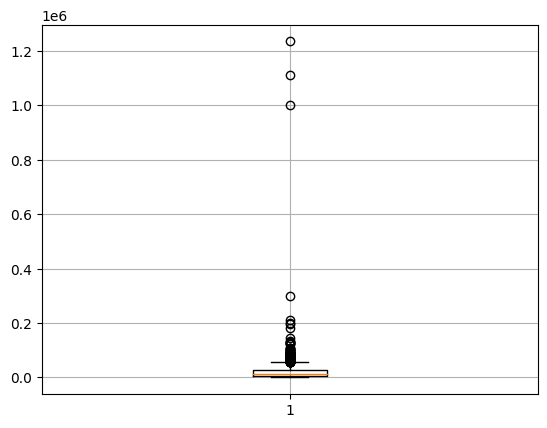

In [214]:
import matplotlib.pyplot as plt

plt.boxplot(df_sample['price'])
plt.grid(True)
plt.show()

COMENTARIO

Tenemos valores de precios de autos usados superiores a 100 mil dolares, veremos como podemos verlos

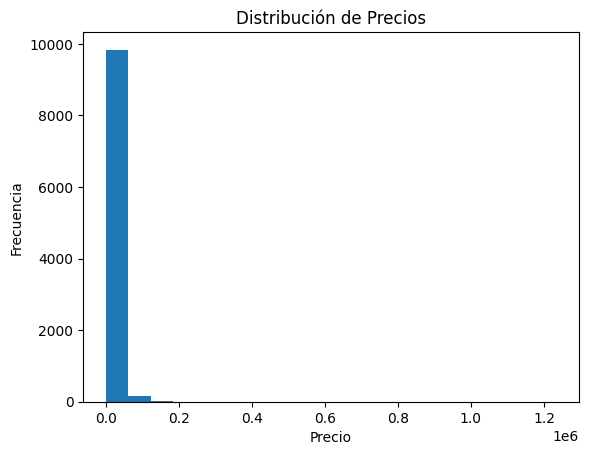

In [215]:
plt.hist(df_sample['price'], bins=20)
plt.xlabel('Precio')
plt.ylabel('Frecuencia')
plt.title('Distribución de Precios')
plt.show()

In [216]:

autos_intermedios = df_sample[(df_sample['price'] > 100000) & (df_sample['price'] < 1000000)]

# Mostrar los resultados
autos_intermedios.head(17)

,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,...,VIN,drive,size,type,paint_color,description,state,lat,long,posting_date
531,daytona beach,209999,2015.00,NaN,Lamborghini Huracan,excellent,10 cylinders,gas,11828.00,clean,...,ZHWUC1ZF9FLA02580,NaN,mid-size,coupe,green,CREDIT AMNESTY! SE HABLA ESPANOL !!OPEN SUNDA...,fl,28.47,-81.40,2021-04-21T15:30:32-0400
766,daytona beach,199999,2017.00,mercedes-benz,g-class,excellent,8 cylinders,gas,15189.00,clean,...,WDCYC5FF7HX279818,NaN,NaN,wagon,yellow,CREDIT AMNESTY! SE HABLA ESPANOL !!OPEN SUNDA...,fl,28.47,-81.40,2021-04-12T16:54:34-0400
1570,las vegas,129888,1993.00,rover,defender 110,NaN,8 cylinders,gas,750.00,clean,...,NaN,4wd,NaN,SUV,black,This Land Rover Defender 110 can be yours toda...,nv,33.47,-111.92,2021-05-02T13:01:59-0700
4179,green bay,122420,2017.00,audi,NaN,NaN,10 cylinders,other,16613.00,clean,...,WUAKBAFX4H7904534,fwd,compact,other,NaN,2017 *** Audi R8 V10 Plus*** Pres...,wi,44.93,-123.03,2021-04-27T16:36:38-0500
4250,north jersey,122420,2017.00,audi,NaN,NaN,10 cylinders,other,16613.00,clean,...,WUAKBAFX4H7904534,fwd,compact,other,NaN,2017 *** Audi R8 V10 Plus*** Pres...,nj,44.93,-123.03,2021-05-04T14:21:26-0400
4498,cleveland,104999,2021.00,cadillac,escalade,excellent,8 cylinders,gas,480.00,clean,...,1GYS4BKLXMR296138,4wd,NaN,SUV,NaN,2021 CADILLAC ESCALADE PREMIUM LUXURY SUV Gu...,oh,41.04,-81.58,2021-04-04T07:30:23-0400
4592,anchorage / mat-su,145000,2014.00,NaN,freightliner m2 106,like new,6 cylinders,diesel,17094.00,clean,...,NaN,4wd,full-size,truck,black,"2014 Freightliner M2 106 4X4 17,094.5 Miles Cu...",ak,55.37,-131.68,2021-04-06T15:56:21-0800
4678,rochester,109000,2013.00,dodge,srt viper,NaN,NaN,gas,3600.00,clean,...,NaN,NaN,NaN,NaN,NaN,2013 Dodge Viper SRT 3600 Miles Car is like BR...,ny,43.07,-77.51,2021-04-27T13:27:11-0400
4722,phoenix,135000,1967.00,chevrolet,camaro ss,excellent,8 cylinders,gas,3000.00,clean,...,NaN,rwd,NaN,coupe,silver,This absolutely immaculate 1967 Chevy Camaro b...,az,33.39,-112.01,2021-05-02T12:11:30-0700
5165,tuscaloosa,104900,2020.00,bmw,m805i,excellent,8 cylinders,gas,9000.00,clean,...,WBAGV8C04LBP48895,4wd,full-size,sedan,black,!!!SUPER FAST IMMACULATE CAR!!! 523 hp! ***LOA...,al,33.33,-87.47,2021-05-03T16:16:01-0500


COMENTARIO

Hemos detectado que los 3 valores por sobre el millon de dolares son datos errados, vamos a elimiar esos 3 valores.

Ademas en los autos que estan entre los 100 mil dolares y los 300 mil dolares hay varios de ellos que si correpsonden a sus precios ya que son autos de lujo o de coleccion, vamos a ver si eliminamos aquellos que no corresponden a estas categorias.

Empezaremos eliminando los autos por sobre el millon de dolares


In [217]:
# Filtramos el DataFrame para mantener solo los registros donde el precio es menor  a 1 millón
df_sample = df_sample[df_sample['price'] < 1000000]

Comentario, si bien los modelos de los autos eran 2 de coleccion, la informacion no correspondia a esos modelos, eran de concesionarios que vendian distintos autos, es por esa razon que se eliminaron esos 3 registros con vehiculos con precios por sobre el millon de dolares.

El grafico Boxplot muestra que ya nop hay registros superiores al millon de dolares en el DataFrame

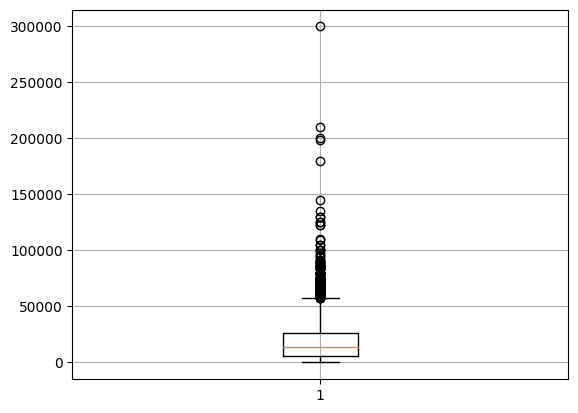

In [218]:
plt.boxplot(df_sample['price'])
plt.grid(True)
plt.show()

COMENTARIO DEL GRAFICO

Si bien el grafico muestra valores atipicos los dejaremos ya que los precios estan correctos para autos de esas caracteristicas

In [219]:
df_sample.loc[1570, 'description']

'This Land Rover Defender 110 can be yours today!If you have bad credit or no credit, we can help!  Call us today at (480) 571-5551!1993 Land Rover Defender 110 Sport Utility 4DPrice: $129,888.00Year: 1993Make: Land RoverModel: Defender 110Odometer: 750 milesEngine: V8, 3.9 LiterTransmission: Manual, 5-SpdColor: BlackThis 1993 Land Rover Defender 110 is fully loaded!Vehicle OptionsV8, 3.9 LiterManual, 5-Spd4WDABS (4-Wheel)Air ConditioningPower WindowsPower Door LocksCruise ControlPower SteeringTilt WheelAM/FM StereoCassetteRoof RackTowing PkgSteel WheelsCome in today!House Of Cars Arizona707 N Scottsdale Rd, Scottsdale, AZ, 85257(480) 571-5551Vehicle OptionsV8, 3.9 Liter, Manual, 5-Spd, 4WD, ABS (4-Wheel), Air Conditioning, Power Windows, Power Door Locks, Cruise Control, Power Steering, Tilt Wheel, AM/FM Stereo, Cassette, Roof Rack, Towing Pkg, Steel Wheels,  SUV SUV 8 0 4 4WD V8, 3.9 Liter Black Gasoline Black Manual, 5-SpdDisclaimer: All vehicles subject to prior sale. We reserve th

COMENTARIO GENERAL COLUMNA PRECIO

Se han eliminado 3 registros por sobre el millon de dolares porque el precio no correspondia al tipo de vehiculo que se mostraba. si bien dos de estos autos eran clasicos, esos valores outliers podrian haber afectado el modelo de prediccion.

para los vehiclulos que estan en el rango de 100 y 300 mil dolares, he decidido dejarlos ya que estos autos tambien son modelos de lujo y estan dentro del rango de valores de estos vehiculos.

** VER LOS VALORES NULOS DE LAS COLUMNAS**

In [220]:
df_sample = df_sample.reset_index(drop=True)
df_sample.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9997 entries, 0 to 9996
Data columns (total 21 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   region        9997 non-null   object 
 1   price         9997 non-null   int64  
 2   year          9971 non-null   float64
 3   manufacturer  9609 non-null   object 
 4   model         9885 non-null   object 
 5   condition     5956 non-null   object 
 6   cylinders     5822 non-null   object 
 7   fuel          9913 non-null   object 
 8   odometer      9893 non-null   float64
 9   title_status  9785 non-null   object 
 10  transmission  9939 non-null   object 
 11  VIN           6205 non-null   object 
 12  drive         6988 non-null   object 
 13  size          2803 non-null   object 
 14  type          7882 non-null   object 
 15  paint_color   7008 non-null   object 
 16  description   9997 non-null   object 
 17  state         9997 non-null   object 
 18  lat           9840 non-null 

In [221]:
df_sample.isnull().sum()

,0
region,0
price,0
year,26
manufacturer,388
model,112
condition,4041
cylinders,4175
fuel,84
odometer,104
title_status,212


**BUSQUEDA** DE VALORES NaN POR COLUMNA

**COLUMNA** YEAR

In [222]:
df_sample['year'].unique()

array([2017., 2006., 2015., 2013., 2019., 2002., 2008., 2016., 2010.,
       2014., 2018., 2009., 1979., 2007., 2005., 2012., 1957., 2011.,
       2020., 2004., 1972., 1995., 1953., 1996., 1956., 1958., 2003.,
       1932., 1989., 2021., 1993., 2001., 1998., 1983., 1999., 1994.,
       2000., 1992., 1982., 1997., 1987., 1976., 1984., 1968., 1985.,
         nan, 1986., 1964., 1969., 1975., 1988., 1934., 1991., 1990.,
       1967., 1962., 2022., 1927., 1974., 1970., 1963., 1980., 1961.,
       1971., 1965., 1955., 1950., 1981., 1978., 1973., 1966., 1960.,
       1954., 1949., 1930., 1948., 1939., 1952., 1947., 1977., 1903.,
       1929., 1931., 1951., 1940., 1959., 1936.])

In [223]:
# Convertir la columna 'year' a tipo int64
df_sample['year'] = df_sample['year'].astype('Int64')

In [224]:
df_sample['year'].sort_values()

,year
6483,1903
2737,1927
1161,1927
7102,1929
6975,1930
...,...
7973,<NA>
9076,<NA>
9447,<NA>
9462,<NA>


In [225]:
df_sample.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9997 entries, 0 to 9996
Data columns (total 21 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   region        9997 non-null   object 
 1   price         9997 non-null   int64  
 2   year          9971 non-null   Int64  
 3   manufacturer  9609 non-null   object 
 4   model         9885 non-null   object 
 5   condition     5956 non-null   object 
 6   cylinders     5822 non-null   object 
 7   fuel          9913 non-null   object 
 8   odometer      9893 non-null   float64
 9   title_status  9785 non-null   object 
 10  transmission  9939 non-null   object 
 11  VIN           6205 non-null   object 
 12  drive         6988 non-null   object 
 13  size          2803 non-null   object 
 14  type          7882 non-null   object 
 15  paint_color   7008 non-null   object 
 16  description   9997 non-null   object 
 17  state         9997 non-null   object 
 18  lat           9840 non-null 

In [226]:
df_sample['year'].isnull().sum()

26

In [227]:
df_sample[['year','description']]

,year,description
0,2017,Carvana is the safer way to buy a car During t...
1,2006,2006 *** Chevrolet Corvette Convertible Conver...
2,2015,➔ Want to see more pictures?Paste this link to...
3,2013,"**Deals, Deals, Deals** Beautiful 2013 BMW 3-S..."
4,2019,2019 Chevrolet Suburban LS Brads Chevy - ☎️ ...
...,...,...
9992,2016,Carvana is the safer way to buy a car During t...
9993,1999,This is a 1999 Ford Club Wagon passenger Van t...
9994,2008,2008 BUICK LUCERNE CX 3.8L V6 POWER WINDOWS ...
9995,2017,Carvana is the safer way to buy a car During t...


COMENTARIO

Vemos que la columna year tiene una relacion con la columna description, en esta ultima columna vemos una descripcion del auto, pero ademas en el comienzo de la descripcion indica un año, usaremos este año para rellenar los valores NaN de la columna year

In [228]:
filas_con_nan = df_sample[df_sample['year'].isna()]
filas_con_nan.head(5)

,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,...,VIN,drive,size,type,paint_color,description,state,lat,long,posting_date
595,minneapolis / st paul,28998,<NA>,NaN,Pilot,NaN,6 cylinders,gas,63811.00,clean,...,5FNYF6H59JB060639,NaN,NaN,SUV,white,"2018 *Honda* *Pilot* EX-L AWD - $28,998Call Us...",mn,44.86,-93.29,2021-05-04T15:40:12-0500
1383,birmingham,49895,<NA>,NaN,he Macan,NaN,4 cylinders,gas,26985.00,clean,...,WP1AA2A56JLB10699,NaN,NaN,SUV,white,"2018 *Porsche* *Macan* SUV - $49,895Call or T...",al,33.67,-86.82,2021-04-23T10:11:39-0500
2188,phoenix,53877,<NA>,NaN,ierra 1500,NaN,8 cylinders,NaN,14396.00,NaN,...,1GTU9CED1KZ168507,4wd,NaN,pickup,blue,2019 *GMC* *Sierra 1500* LIFTED - Elevation Ed...,az,33.44,-111.93,2021-05-03T12:51:05-0700
2459,omaha / council bluffs,11995,<NA>,NaN,olet CRUZE,NaN,4 cylinders,gas,13467.00,NaN,...,3G1BC6SM7KS607164,fwd,NaN,sedan,black,2019 *Chevrolet* *CRUZE* 4dr Hatchback LS Seda...,ia,41.23,-95.85,2021-04-29T08:50:56-0500
2718,denver,51900,<NA>,NaN,Odyssey,NaN,6 cylinders,gas,12039.00,clean,...,5FNRL6H75KB041232,fwd,NaN,van,brown,2019 *Honda* *Odyssey* EX-L w/Navi/RES Automat...,co,39.67,-105.00,2021-05-01T13:10:32-0600


In [229]:
filas_con_NaN = df_sample.iloc[596:598]
filas_con_NaN

,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,...,VIN,drive,size,type,paint_color,description,state,lat,long,posting_date
596,bellingham,423,2015,ram,1500,NaN,8 cylinders,gas,82643.00,clean,...,1C6RR7MT6FS536630,4wd,NaN,truck,NaN,2015 Ram 1500 Sport Truck STOCK #: F2...,wa,48.75,-122.47,2021-04-17T10:51:54-0700
597,pullman / moscow,54999,2019,gmc,sierra 1500 at4 4x4 1/2 ton,NaN,NaN,gas,47600.00,clean,...,1GTP9EED6KZ234087,4wd,NaN,truck,brown,2019 GMC Sierra 1500 AT4 4x4 **Clean Carfax 4x...,id,47.66,-117.24,2021-04-23T10:36:54-0700


In [230]:
import pandas as pd
import re

Realizaremos una funcion para extraer el año de la columna description y usaremos esa informacion para rellenar los valores NaN de la columna year

In [231]:

def extraer_año(texto):
  """Extrae el año de un texto, asumiendo que el año está al inicio.

  Args:
    texto: Una cadena de texto que contiene el año.

  Returns:
    El año extraído como un entero, o None si no se encuentra.
  """

  patron = r'^\d{4}'  # Busca 4 dígitos al inicio del texto
  match = re.search(patron, texto)
  return int(match.group()) if match else None

# Llamamos a nuestra df_sample para rellenar los valores NaN solo con el año de la columna description
df_sample['year'] = df_sample['year'].fillna(df_sample['description'].apply(extraer_año))

Confirmamos que se se han rellenado los NaN de year solo con el año de la columna description

In [232]:
df_sample.iloc[596:598]

,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,...,VIN,drive,size,type,paint_color,description,state,lat,long,posting_date
596,bellingham,423,2015,ram,1500,NaN,8 cylinders,gas,82643.00,clean,...,1C6RR7MT6FS536630,4wd,NaN,truck,NaN,2015 Ram 1500 Sport Truck STOCK #: F2...,wa,48.75,-122.47,2021-04-17T10:51:54-0700
597,pullman / moscow,54999,2019,gmc,sierra 1500 at4 4x4 1/2 ton,NaN,NaN,gas,47600.00,clean,...,1GTP9EED6KZ234087,4wd,NaN,truck,brown,2019 GMC Sierra 1500 AT4 4x4 **Clean Carfax 4x...,id,47.66,-117.24,2021-04-23T10:36:54-0700


In [233]:
df_sample.iloc[1384:1386]

,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,...,VIN,drive,size,type,paint_color,description,state,lat,long,posting_date
1384,yuba-sutter,6499,2006,pontiac,vibe,excellent,4 cylinders,gas,108102.00,clean,...,5Y2SL65876Z402765,NaN,NaN,hatchback,NaN,"2006 Pontiac Vibe108,102 mi. - Manual - 4D Hat...",ca,39.12,-121.61,2021-04-21T13:33:19-0700
1385,jacksonville,7400,2008,bmw,x5,NaN,6 cylinders,gas,179000.00,clean,...,NaN,NaN,NaN,NaN,NaN,2008 BMW X5 with 179k miles... 3.0L v6 engine....,fl,30.28,-81.58,2021-04-27T13:44:36-0400


In [234]:
df_sample['year'].sort_values()

,year
6483,1903
1161,1927
2737,1927
7102,1929
4359,1930
...,...
4627,2022
8399,2022
8117,2022
1160,2022


confirmamos que se han rellenado los valores NaN de la columna year

In [235]:
df_sample.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9997 entries, 0 to 9996
Data columns (total 21 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   region        9997 non-null   object 
 1   price         9997 non-null   int64  
 2   year          9997 non-null   Int64  
 3   manufacturer  9609 non-null   object 
 4   model         9885 non-null   object 
 5   condition     5956 non-null   object 
 6   cylinders     5822 non-null   object 
 7   fuel          9913 non-null   object 
 8   odometer      9893 non-null   float64
 9   title_status  9785 non-null   object 
 10  transmission  9939 non-null   object 
 11  VIN           6205 non-null   object 
 12  drive         6988 non-null   object 
 13  size          2803 non-null   object 
 14  type          7882 non-null   object 
 15  paint_color   7008 non-null   object 
 16  description   9997 non-null   object 
 17  state         9997 non-null   object 
 18  lat           9840 non-null 

**COLUMNA** manufacturer

Tenemos 389 NaN

In [236]:
df_sample['manufacturer'].unique()

array(['ford', 'chevrolet', 'bmw', 'chrysler', 'mitsubishi', 'hyundai',
       'gmc', 'mercedes-benz', 'porsche', 'infiniti', nan, 'volkswagen',
       'honda', 'subaru', 'kia', 'ram', 'jeep', 'nissan', 'toyota',
       'cadillac', 'acura', 'lexus', 'audi', 'volvo', 'mazda', 'lincoln',
       'rover', 'dodge', 'buick', 'mini', 'jaguar', 'saturn', 'tesla',
       'pontiac', 'fiat', 'mercury', 'alfa-romeo', 'ferrari',
       'aston-martin', 'land rover'], dtype=object)

In [237]:
df_sample['manufacturer'].value_counts()

,count
manufacturer,
ford,1636
chevrolet,1341
toyota,824
honda,476
nissan,451
ram,437
jeep,432
gmc,406
bmw,349


In [238]:
df_sample['manufacturer'].sort_values()

,manufacturer
868,acura
8905,acura
1477,acura
5455,acura
3350,acura
...,...
9883,NaN
9910,NaN
9942,NaN
9961,NaN


In [239]:
# Buscamos alguna relacion entre las columnas
df_sample[['manufacturer','model']]

,manufacturer,model
0,ford,f150 super cab lariat
1,chevrolet,corvette
2,chevrolet,corvette
3,bmw,328i
4,chevrolet,suburban ls
...,...,...
9992,kia,forte koup sx coupe 2d
9993,ford,club wagon
9994,buick,lucerne
9995,dodge,challenger r/t coupe 2d


In [240]:
filas_con_nan = df_sample[df_sample['manufacturer'].isna()]
filas_con_nan.head(30)

,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,...,VIN,drive,size,type,paint_color,description,state,lat,long,posting_date
21,new haven,7500,1979,NaN,Triumph Spitfire 1500,good,4 cylinders,gas,82947.00,clean,...,NaN,rwd,NaN,convertible,white,"1979 Triumph Spitfire 1500. 82,947 miles. Resp...",ct,41.20,-73.44,2021-04-19T09:56:56-0400
29,plattsburgh-adirondacks,1500,1957,NaN,edsel corsair,fair,8 cylinders,gas,100000.00,missing,...,NaN,rwd,full-size,coupe,black,"edsel ,,,,,,2dr ht ,,,,,,,,restore or use as p...",ny,44.61,-73.58,2021-05-03T11:28:24-0400
67,new haven,8800,1996,NaN,International,excellent,6 cylinders,diesel,372000.00,clean,...,NaN,rwd,full-size,NaN,white,Selling my 1996 international oil truck tanker...,ct,41.55,-72.98,2021-04-07T17:12:05-0400
135,greenville / upstate,16250,1993,NaN,airstream,good,NaN,gas,1.00,clean,...,NaN,NaN,NaN,other,NaN,"All working appliances, working AC/heat",sc,34.87,-82.32,2021-04-06T14:11:47-0400
147,hartford,7495,2008,NaN,MERCEDES-BENZ* R-CLASS*,NaN,NaN,gas,136188.00,clean,...,4JGCB65E58A075454,NaN,full-size,other,blue,2008 Mercedes-Benz* R-CLASS* R350* 4 MATIC* SU...,ct,41.66,-72.87,2021-04-28T11:14:29-0400
191,louisville,7500,2008,NaN,Check tahoe,good,8 cylinders,gas,200000.00,clean,...,NaN,4wd,full-size,SUV,NaN,LTZ (top of line). Runs great. All bells and w...,ky,38.19,-85.65,2021-04-15T17:45:07-0400
252,new haven,5450,2010,NaN,"2010 HYUNDAI, SANTA FE",excellent,4 cylinders,gas,143210.00,clean,...,NaN,4wd,mid-size,SUV,blue,"THIS IS A REALLY NICE, 2010 HYUNDAI SANTA FE, ...",ct,41.33,-72.97,2021-04-11T11:34:33-0400
276,helena,21999,2017,NaN,2017,NaN,NaN,gas,51000.00,clean,...,NaN,NaN,NaN,NaN,NaN,CALL OR TEXT BLAYNE @ 406-450-6788 2017 FORD ...,mt,48.18,-111.94,2021-04-05T10:45:27-0600
299,atlanta,19900,2003,NaN,Freightliner FL70,excellent,NaN,diesel,188000.00,clean,...,NaN,NaN,NaN,truck,white,"2003 Freightliner FL 70, 230 HP Cat 3126. 33,0...",ga,34.22,-118.37,2021-04-30T17:08:04-0400
359,medford-ashland,27975,2005,NaN,Freightliner M2,good,6 cylinders,diesel,90634.00,clean,...,1FVACWDD15HU19791,rwd,full-size,truck,white,Excellent shape inside and out Hydraulic Brak...,or,42.34,-122.90,2021-04-08T20:44:53-0700


In [241]:
df_sample.loc[21, 'model'] # es Triumph

'Triumph Spitfire 1500'

In [242]:
df_sample.loc[712, 'description']

'💬💬💬 HABLAMOS ESPAÑOL. FINANCIAMIENTO FACIL. 💬💬💬 TODOS CALIFICAN NO IMPORTA SU CREDITO Para mas informacion, llamar al ☎ 9547459599 Ready To Upgrade Your Ride Today? We Make It Fast & Easy!Call (or text) ☏ (954) 280-1878 HAPPY CAR SALES 203 W STATE ROAD 84, FORT LAUDERDALE , FL 33315Or use the link belowto view more information!http://happycarsflorida.com/cars/14122249Year : 2012Make : HyundaiModel : AccentMileage : 102,837 milesTransmission : AutomaticExterior Color : BlueInterior Color : GraySeries : SedanDrivetrain :  FWDCondition : ExcellentVIN : KMHCT4AE9CU153443Stock ID : FL1765Engine : 1.6L 138.0hp\xa0 Easy Financing for all credit types with little money down. We will help you if you had a repossession!!!\xa0🚗⚡💥 \xa0🚩 CHECK OUT OUR REVIEWS ON FACEBOOK:  https://www.facebook.com/Happycarsfortlauderdale/> > > $4,995 < < <   Call (or Text)  (954) 280-1878 for quick answers to your questions about this Hyundai Accent 4dr Sdn Man GLS.Description of this Hyundai Accent 4dr Sdn Man GL

Despues de analizar varias columnas, no es posible determinar todos los vehiculos a que marca petenecen, por ejmplo el primero es Triumh, ademas hay varios camiones como international o Freightline, hay camionetas que podrian haberla construido chevrolet, hay modelos que se identifican bien como mercedez o mazda,sin embarho como son muchos registros, he decidido cambiar los valores NaN por la moda".

In [243]:
# Reemplazar los NaN con la MODA
df_sample['manufacturer'] = df_sample['manufacturer'].fillna(df_sample['manufacturer'].mode()[0])

In [244]:
df_sample.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9997 entries, 0 to 9996
Data columns (total 21 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   region        9997 non-null   object 
 1   price         9997 non-null   int64  
 2   year          9997 non-null   Int64  
 3   manufacturer  9997 non-null   object 
 4   model         9885 non-null   object 
 5   condition     5956 non-null   object 
 6   cylinders     5822 non-null   object 
 7   fuel          9913 non-null   object 
 8   odometer      9893 non-null   float64
 9   title_status  9785 non-null   object 
 10  transmission  9939 non-null   object 
 11  VIN           6205 non-null   object 
 12  drive         6988 non-null   object 
 13  size          2803 non-null   object 
 14  type          7882 non-null   object 
 15  paint_color   7008 non-null   object 
 16  description   9997 non-null   object 
 17  state         9997 non-null   object 
 18  lat           9840 non-null 

**COLUMNA** MODEL

In [245]:
df_sample['model'].isnull().sum()

112

In [246]:
df_sample['model'].unique()

array(['f150 super cab lariat', 'corvette', '328i', ...,
       'altima 4dr sdn i4 2.5 s', 'cavalier ls', 'club wagon'],
      dtype=object)

In [247]:
df_sample['model'].value_counts()

,count
model,
f-150,199
silverado 1500,122
1500,108
accord,70
tacoma,69
...,...
tacoma sr,1
benz sl550,1
a4 2.0t quattro,1


In [248]:
df_sample['model'].sort_values()

,model
8730,'99 H1 Hummer
7336,- forester
1963,09 HONDS ODYSSEY EXL
6380,1 series 128i
3909,1 series 128i convertible 2d
...,...
9819,NaN
9830,NaN
9857,NaN
9960,NaN


In [249]:
# Buscamos alguna relacion entre las columnas
df_sample[['year','manufacturer','model','description']]

,year,manufacturer,model,description
0,2017,ford,f150 super cab lariat,Carvana is the safer way to buy a car During t...
1,2006,chevrolet,corvette,2006 *** Chevrolet Corvette Convertible Conver...
2,2015,chevrolet,corvette,➔ Want to see more pictures?Paste this link to...
3,2013,bmw,328i,"**Deals, Deals, Deals** Beautiful 2013 BMW 3-S..."
4,2019,chevrolet,suburban ls,2019 Chevrolet Suburban LS Brads Chevy - ☎️ ...
...,...,...,...,...
9992,2016,kia,forte koup sx coupe 2d,Carvana is the safer way to buy a car During t...
9993,1999,ford,club wagon,This is a 1999 Ford Club Wagon passenger Van t...
9994,2008,buick,lucerne,2008 BUICK LUCERNE CX 3.8L V6 POWER WINDOWS ...
9995,2017,dodge,challenger r/t coupe 2d,Carvana is the safer way to buy a car During t...


In [250]:
# Filtrar solo los registros donde la marca es 'Ford'
ford_models = df_sample[df_sample['manufacturer'] == 'ford']
ford_models.head()

,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,...,VIN,drive,size,type,paint_color,description,state,lat,long,posting_date
0,lakeland,36990,2017,ford,f150 super cab lariat,good,6 cylinders,gas,38094.00,clean,...,1FTFX1EG9HKD14814,4wd,NaN,pickup,white,Carvana is the safer way to buy a car During t...,fl,28.04,-81.96,2021-05-02T15:31:06-0400
8,charlotte,22991,2016,ford,mustang,NaN,4 cylinders,gas,79631.00,clean,...,1FA6P8TH9G5224182,rwd,NaN,other,custom,2016 Ford Mustang EcoBoost Coupe 2DCall or tex...,nc,42.20,-79.83,2021-05-04T18:02:04-0400
10,appleton-oshkosh-FDL,10950,2010,ford,f-150,NaN,8 cylinders,gas,150900.00,clean,...,1FTFX1EV8AFD31651,4wd,full-size,pickup,red,Euhardys Auto & CycleAsk for: Rob Euhardy☎ (86...,wi,44.41,-88.81,2021-04-28T16:47:31-0500
12,knoxville,16990,2013,ford,f-150 xlt,NaN,6 cylinders,gas,137000.00,clean,...,NaN,rwd,NaN,NaN,green,2013 Ford F-150 XLT 2WD Crew Cab Texas Edition...,tn,35.90,-83.82,2021-04-17T11:20:50-0400
15,hawaii,23000,2017,ford,fusion sport awd,like new,6 cylinders,gas,31500.00,clean,...,NaN,4wd,full-size,sedan,black,2017 Ford Fusion Sport for Sale. I am the orig...,hi,20.74,-156.45,2021-05-02T17:21:18-1000


In [251]:
# Mostrar los modelos de Ford
ford_models['model'].nunique()

784

In [252]:
filas_con_nan = df_sample[df_sample['model'].isna()]
filas_con_nan.head(5)

,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,...,VIN,drive,size,type,paint_color,description,state,lat,long,posting_date
19,philadelphia,7999,2009,ford,NaN,good,6 cylinders,gas,89000.00,clean,...,NaN,4wd,NaN,SUV,black,2009 Ford Escape 4x4 Xlt. This is the loaded ...,pa,39.82,-75.77,2021-04-19T16:16:59-0400
57,klamath falls,1250,1995,chrysler,NaN,good,6 cylinders,gas,214000.00,clean,...,NaN,fwd,compact,NaN,blue,This car is one owner that took the BEST care ...,or,42.30,-121.81,2021-04-12T18:17:59-0700
86,kenosha-racine,33000,1958,chevrolet,NaN,like new,8 cylinders,gas,20000.00,clean,...,XXXXXXXXXXX,rwd,full-size,wagon,red,Unique 1958 Chevy Brookwood wagon Pictures don...,wi,42.47,-87.84,2021-04-23T10:37:45-0500
109,modesto,5900,1989,toyota,NaN,good,4 cylinders,gas,138000.00,clean,...,NaN,fwd,compact,pickup,white,1989 TOYOTA PICK UP TRUCK WITH CAMPER SHELL 13...,ca,37.77,-120.84,2021-04-29T20:38:12-0700
190,southern maryland,0,2014,rover,NaN,NaN,NaN,gas,78451.00,clean,...,SALGV3TF8EA169923,NaN,NaN,SUV,black,2014 Land Rover Range Rover Autobiography LWB ...,md,38.63,-76.90,2021-04-26T15:29:02-0400


COMENTARIO

Analiando la columna model, no es posible relacionar el modelo de auto especifico para la fila con NaN, por lo tanto realizaremos una funcion que agregue los modelos mas comunes a sus respectivas marcas de autos y rellenaremos los valores NaN pendientes

In [253]:
# Función para encontrar los modelos más comunes de una marca
def encontrar_modelos_comunes(df_sample, manufacturer):

    # Se agrega una verificación para comprobar si el fabricante existe antes de filtrar
    if df_sample['manufacturer'].isin([manufacturer]).any():
        modelos_comunes = df_sample[df_sample['manufacturer'] == manufacturer]['model'].value_counts().index.tolist()
        return modelos_comunes
    else:
        return []

# Función para rellenar los NaN de una marca con el modelo más común
def rellenar_nan_por_marca(df_sample, manufacturer, columna_model='model'):
    modelos_comunes = encontrar_modelos_comunes(df_sample, manufacturer)
    # Solo rellenar si hay modelos comunes
    if modelos_comunes:
        df_sample.loc[(df_sample['manufacturer'] == manufacturer) & (df_sample[columna_model].isnull()), columna_model] = modelos_comunes[0]

# Aplicar la función a cada marca
marcas = df['manufacturer'].unique()
for marca in marcas:
    rellenar_nan_por_marca(df_sample, marca)

df_sample

,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,...,VIN,drive,size,type,paint_color,description,state,lat,long,posting_date
0,lakeland,36990,2017,ford,f150 super cab lariat,good,6 cylinders,gas,38094.00,clean,...,1FTFX1EG9HKD14814,4wd,NaN,pickup,white,Carvana is the safer way to buy a car During t...,fl,28.04,-81.96,2021-05-02T15:31:06-0400
1,"quad cities, IA/IL",27995,2006,chevrolet,corvette,good,8 cylinders,gas,NaN,clean,...,NaN,rwd,NaN,convertible,black,2006 *** Chevrolet Corvette Convertible Conver...,il,42.48,-92.37,2021-04-29T18:46:35-0500
2,little rock,78423,2015,chevrolet,corvette,NaN,8 cylinders,gas,30200.00,clean,...,NaN,rwd,NaN,convertible,NaN,➔ Want to see more pictures?Paste this link to...,ar,38.40,-93.78,2021-04-17T14:01:33-0500
3,northern panhandle,14000,2013,bmw,328i,NaN,NaN,gas,92965.00,clean,...,NaN,NaN,NaN,NaN,NaN,"**Deals, Deals, Deals** Beautiful 2013 BMW 3-S...",oh,40.32,-80.62,2021-04-25T23:53:42-0400
4,eugene,676,2019,chevrolet,suburban ls,NaN,8 cylinders,other,47105.00,clean,...,1GNSKGKC7KR124145,NaN,NaN,NaN,black,2019 Chevrolet Suburban LS Brads Chevy - ☎️ ...,or,43.78,-123.05,2021-05-01T10:04:24-0700
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9992,baltimore,15590,2016,kia,forte koup sx coupe 2d,good,NaN,gas,53066.00,clean,...,KNAFZ6A39G5606001,fwd,NaN,coupe,red,Carvana is the safer way to buy a car During t...,md,39.30,-76.61,2021-05-03T13:51:19-0400
9993,humboldt county,5500,1999,ford,club wagon,good,8 cylinders,gas,298000.00,clean,...,NaN,rwd,full-size,NaN,white,This is a 1999 Ford Club Wagon passenger Van t...,ca,40.76,-124.16,2021-04-28T11:11:26-0700
9994,saginaw-midland-baycity,4495,2008,buick,lucerne,good,6 cylinders,gas,132309.00,clean,...,NaN,NaN,NaN,sedan,NaN,2008 BUICK LUCERNE CX 3.8L V6 POWER WINDOWS ...,mi,43.42,-83.97,2021-04-30T15:18:04-0400
9995,new haven,32990,2017,dodge,challenger r/t coupe 2d,good,8 cylinders,gas,29114.00,clean,...,2C3CDZBT2HH666317,rwd,NaN,coupe,NaN,Carvana is the safer way to buy a car During t...,ct,41.31,-72.92,2021-04-24T11:51:12-0400


In [254]:
df_sample.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9997 entries, 0 to 9996
Data columns (total 21 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   region        9997 non-null   object 
 1   price         9997 non-null   int64  
 2   year          9997 non-null   Int64  
 3   manufacturer  9997 non-null   object 
 4   model         9997 non-null   object 
 5   condition     5956 non-null   object 
 6   cylinders     5822 non-null   object 
 7   fuel          9913 non-null   object 
 8   odometer      9893 non-null   float64
 9   title_status  9785 non-null   object 
 10  transmission  9939 non-null   object 
 11  VIN           6205 non-null   object 
 12  drive         6988 non-null   object 
 13  size          2803 non-null   object 
 14  type          7882 non-null   object 
 15  paint_color   7008 non-null   object 
 16  description   9997 non-null   object 
 17  state         9997 non-null   object 
 18  lat           9840 non-null 

**COLUNNA** CONDITION

Esta columna tiene casi el 40% de datos NaN, analizaremos si rescatamos los datos, los modificamos por otros o eliminamos esta columna de nuestro DataFrame

In [255]:
df_sample['condition'].unique()

array(['good', nan, 'excellent', 'like new', 'fair', 'new', 'salvage'],
      dtype=object)

In [256]:
df_sample['condition'].isnull().sum()
# Casi el 40% de los datos son NaN

4041

In [257]:
df_sample['condition'].value_counts()

,count
condition,
good,2830
excellent,2383
like new,519
fair,171
new,34
salvage,19


In [258]:
df_sample['condition'].sort_values()

,condition
2344,excellent
8156,excellent
2999,excellent
3005,excellent
8148,excellent
...,...
9984,NaN
9986,NaN
9988,NaN
9991,NaN


In [259]:
# Buscamos alguna relacion entre las columnas
df_sample[['year','manufacturer','model','condition','description']]

,year,manufacturer,model,condition,description
0,2017,ford,f150 super cab lariat,good,Carvana is the safer way to buy a car During t...
1,2006,chevrolet,corvette,good,2006 *** Chevrolet Corvette Convertible Conver...
2,2015,chevrolet,corvette,NaN,➔ Want to see more pictures?Paste this link to...
3,2013,bmw,328i,NaN,"**Deals, Deals, Deals** Beautiful 2013 BMW 3-S..."
4,2019,chevrolet,suburban ls,NaN,2019 Chevrolet Suburban LS Brads Chevy - ☎️ ...
...,...,...,...,...,...
9992,2016,kia,forte koup sx coupe 2d,good,Carvana is the safer way to buy a car During t...
9993,1999,ford,club wagon,good,This is a 1999 Ford Club Wagon passenger Van t...
9994,2008,buick,lucerne,good,2008 BUICK LUCERNE CX 3.8L V6 POWER WINDOWS ...
9995,2017,dodge,challenger r/t coupe 2d,good,Carvana is the safer way to buy a car During t...


COMENTARIO

Como esta columna tiene el 40% de valores NaN he decidido que rellenearemos esos NaN con el valor "desconocido", la columna es imprtante para el analisis posterior por tal motivo no se debe eliminar la columna

In [260]:
df_sample['condition'].fillna('desconocido', inplace=True)

In [261]:
df_sample['condition'].unique()

array(['good', 'desconocido', 'excellent', 'like new', 'fair', 'new',
       'salvage'], dtype=object)

In [262]:
df_sample.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9997 entries, 0 to 9996
Data columns (total 21 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   region        9997 non-null   object 
 1   price         9997 non-null   int64  
 2   year          9997 non-null   Int64  
 3   manufacturer  9997 non-null   object 
 4   model         9997 non-null   object 
 5   condition     9997 non-null   object 
 6   cylinders     5822 non-null   object 
 7   fuel          9913 non-null   object 
 8   odometer      9893 non-null   float64
 9   title_status  9785 non-null   object 
 10  transmission  9939 non-null   object 
 11  VIN           6205 non-null   object 
 12  drive         6988 non-null   object 
 13  size          2803 non-null   object 
 14  type          7882 non-null   object 
 15  paint_color   7008 non-null   object 
 16  description   9997 non-null   object 
 17  state         9997 non-null   object 
 18  lat           9840 non-null 

**COLUMNA** CYLINDERS

In [263]:
df_sample['cylinders'].isnull().sum()

4175

In [264]:
# esta columna tambien tiene el 40% de valores NaN
df_sample['cylinders'].unique()

array(['6 cylinders', '8 cylinders', nan, '4 cylinders', 'other',
       '5 cylinders', '10 cylinders', '12 cylinders', '3 cylinders'],
      dtype=object)

In [265]:
df_sample['cylinders'].value_counts()

,count
cylinders,
6 cylinders,2207
4 cylinders,1774
8 cylinders,1720
5 cylinders,42
10 cylinders,36
other,20
3 cylinders,17
12 cylinders,6


In [266]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

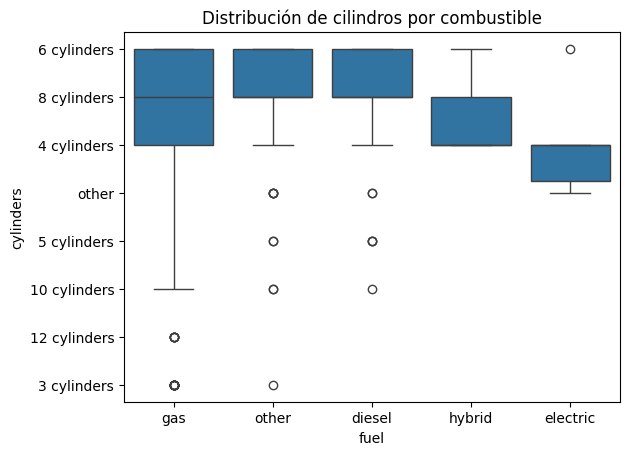

In [267]:
# Tabla cruzada para ver la relación entre cilindros y tipo de motor
pd.crosstab(df_sample['cylinders'], df_sample['fuel'])

# Gráfico de caja para comparar la distribución de cilindros por tipo de motor
sns.boxplot(x='fuel', y='cylinders', data=df_sample)
plt.title('Distribución de cilindros por combustible')
plt.show()

COMENTARIO

Esta columna tambien tiene sobre el 40% de sus valores como NaN, por lo tanto tambien imputaremos los NaN con un valor desconocido

In [268]:
df_sample['cylinders'].fillna('other', inplace=True)

In [269]:
df_sample.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9997 entries, 0 to 9996
Data columns (total 21 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   region        9997 non-null   object 
 1   price         9997 non-null   int64  
 2   year          9997 non-null   Int64  
 3   manufacturer  9997 non-null   object 
 4   model         9997 non-null   object 
 5   condition     9997 non-null   object 
 6   cylinders     9997 non-null   object 
 7   fuel          9913 non-null   object 
 8   odometer      9893 non-null   float64
 9   title_status  9785 non-null   object 
 10  transmission  9939 non-null   object 
 11  VIN           6205 non-null   object 
 12  drive         6988 non-null   object 
 13  size          2803 non-null   object 
 14  type          7882 non-null   object 
 15  paint_color   7008 non-null   object 
 16  description   9997 non-null   object 
 17  state         9997 non-null   object 
 18  lat           9840 non-null 

**COLUMNA** FUEL

In [270]:
df_sample['fuel'].isnull().sum()

84

In [271]:
df_sample['fuel'].unique()

array(['gas', 'other', 'diesel', 'hybrid', nan, 'electric'], dtype=object)

In [272]:
# Buscamos alguna relacion entre las columnas
df_sample[['year','manufacturer','model','fuel','odometer','title_status','transmission']]

,year,manufacturer,model,fuel,odometer,title_status,transmission
0,2017,ford,f150 super cab lariat,gas,38094.00,clean,other
1,2006,chevrolet,corvette,gas,NaN,clean,manual
2,2015,chevrolet,corvette,gas,30200.00,clean,automatic
3,2013,bmw,328i,gas,92965.00,clean,automatic
4,2019,chevrolet,suburban ls,other,47105.00,clean,automatic
...,...,...,...,...,...,...,...
9992,2016,kia,forte koup sx coupe 2d,gas,53066.00,clean,other
9993,1999,ford,club wagon,gas,298000.00,clean,automatic
9994,2008,buick,lucerne,gas,132309.00,clean,automatic
9995,2017,dodge,challenger r/t coupe 2d,gas,29114.00,clean,other


COMENTARIO

Para la columna fuel no se ve ninguna relacion con las columnas elegidas, podria haber una relacion entre el combustible y el año de fabricacion, o el modelo edl auto, etc.

Como tenemos pocos valores faltantes , los valores NaN los tratremos con la moda de la columna fuel

In [273]:
# Rellenar valores nulos con la moda de la columna
df_sample['fuel'] = df_sample['fuel'].fillna(df_sample['fuel'].mode()[0])

In [274]:
df_sample.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9997 entries, 0 to 9996
Data columns (total 21 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   region        9997 non-null   object 
 1   price         9997 non-null   int64  
 2   year          9997 non-null   Int64  
 3   manufacturer  9997 non-null   object 
 4   model         9997 non-null   object 
 5   condition     9997 non-null   object 
 6   cylinders     9997 non-null   object 
 7   fuel          9997 non-null   object 
 8   odometer      9893 non-null   float64
 9   title_status  9785 non-null   object 
 10  transmission  9939 non-null   object 
 11  VIN           6205 non-null   object 
 12  drive         6988 non-null   object 
 13  size          2803 non-null   object 
 14  type          7882 non-null   object 
 15  paint_color   7008 non-null   object 
 16  description   9997 non-null   object 
 17  state         9997 non-null   object 
 18  lat           9840 non-null 

**COLUMNA** ODOMETER

Realizaremos el mismo tratamiento de la columna fuel, ocuparemos la moda

In [275]:
df_sample['odometer'].isnull().sum()

104

In [276]:
df_sample['odometer'].unique()

array([ 38094.,     nan,  30200., ..., 132309.,  29114.,   4189.])

In [277]:
# Rellenar valores nulos con la moda de la columna
df_sample['odometer'] = df_sample['odometer'].fillna(df_sample['odometer'].mode()[0])

In [278]:
df_sample.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9997 entries, 0 to 9996
Data columns (total 21 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   region        9997 non-null   object 
 1   price         9997 non-null   int64  
 2   year          9997 non-null   Int64  
 3   manufacturer  9997 non-null   object 
 4   model         9997 non-null   object 
 5   condition     9997 non-null   object 
 6   cylinders     9997 non-null   object 
 7   fuel          9997 non-null   object 
 8   odometer      9997 non-null   float64
 9   title_status  9785 non-null   object 
 10  transmission  9939 non-null   object 
 11  VIN           6205 non-null   object 
 12  drive         6988 non-null   object 
 13  size          2803 non-null   object 
 14  type          7882 non-null   object 
 15  paint_color   7008 non-null   object 
 16  description   9997 non-null   object 
 17  state         9997 non-null   object 
 18  lat           9840 non-null 

**COLUMNA** TITLE STATUS Y COLUMNA TRANSMISSION

ocuparemos la misma estrategia de la moda

In [279]:
df_sample['title_status'].isnull().sum()

212

In [280]:
df_sample['title_status'].unique()

array(['clean', 'missing', nan, 'salvage', 'rebuilt', 'lien',
       'parts only'], dtype=object)

In [281]:
df_sample['transmission'].isnull().sum ()

58

In [282]:
df_sample['transmission'].unique()

array(['other', 'manual', 'automatic', nan], dtype=object)

In [283]:
#SUSTITUCION CON LA MODA DE LAS COLUMNAS title_status y transmission
for column in ['title_status', 'transmission']:
    df_sample[column] = df_sample[column].fillna(df_sample[column].mode()[0])

In [284]:
df_sample.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9997 entries, 0 to 9996
Data columns (total 21 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   region        9997 non-null   object 
 1   price         9997 non-null   int64  
 2   year          9997 non-null   Int64  
 3   manufacturer  9997 non-null   object 
 4   model         9997 non-null   object 
 5   condition     9997 non-null   object 
 6   cylinders     9997 non-null   object 
 7   fuel          9997 non-null   object 
 8   odometer      9997 non-null   float64
 9   title_status  9997 non-null   object 
 10  transmission  9997 non-null   object 
 11  VIN           6205 non-null   object 
 12  drive         6988 non-null   object 
 13  size          2803 non-null   object 
 14  type          7882 non-null   object 
 15  paint_color   7008 non-null   object 
 16  description   9997 non-null   object 
 17  state         9997 non-null   object 
 18  lat           9840 non-null 

**COLUMNA** VIN

In [285]:
df_sample['VIN'].isnull().sum()

3792

COMENTARIO:

La columna VIN representa el numero unico de cada auto, puede ser su numero de chasis por ejemplo, este valor no se puede cambiar ya que es un valor unico, por lo tanto los valores NaN lo reemplazaremos con un 'desconocido'

In [286]:
df_sample['VIN'].unique()

array(['1FTFX1EG9HKD14814', nan, '1GNSKGKC7KR124145', ...,
       'WDDNG71X69A248241', '2C3CDZBT2HH666317', '3N1AB8DV3LY206350'],
      dtype=object)

In [287]:
df_sample['VIN'].fillna('desconocido', inplace=True)

In [288]:
df_sample.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9997 entries, 0 to 9996
Data columns (total 21 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   region        9997 non-null   object 
 1   price         9997 non-null   int64  
 2   year          9997 non-null   Int64  
 3   manufacturer  9997 non-null   object 
 4   model         9997 non-null   object 
 5   condition     9997 non-null   object 
 6   cylinders     9997 non-null   object 
 7   fuel          9997 non-null   object 
 8   odometer      9997 non-null   float64
 9   title_status  9997 non-null   object 
 10  transmission  9997 non-null   object 
 11  VIN           9997 non-null   object 
 12  drive         6988 non-null   object 
 13  size          2803 non-null   object 
 14  type          7882 non-null   object 
 15  paint_color   7008 non-null   object 
 16  description   9997 non-null   object 
 17  state         9997 non-null   object 
 18  lat           9840 non-null 

TRATAMIENTO DE VARIAS COLUMNAS AL MISMO TIEMPO CON LA ETIQUETA DESCONOCIDO.

Las columnas drive, type, paint color las tratarmeos de la misma forma que la columna anterior, ya que estas columnas no es posible relacionarla con ninguna otra columna, tampoco podemos agregarle la moda o la media porque podriamos darle un valor incorrecto a algun tipo de auto, por ejemplo un auto clasico, le podriamos agregar a la columna drive una clasificacion erronea, el auto clasico podria tener una transmision mecanica y al imputar la columna por la moda o la media podria agregarle una transmision automatica. es mejor que se clasifiquen por desconocido

In [289]:
df_sample['drive'].unique()

array(['4wd', 'rwd', nan, 'fwd'], dtype=object)

In [290]:
df_sample['size'].unique()

array([nan, 'mid-size', 'full-size', 'compact', 'sub-compact'],
      dtype=object)

In [291]:
df_sample['type'].unique()

array(['pickup', 'convertible', nan, 'mini-van', 'SUV', 'sedan', 'other',
       'hatchback', 'coupe', 'wagon', 'van', 'truck', 'bus', 'offroad'],
      dtype=object)

In [292]:
df_sample['paint_color'].unique()

array(['white', 'black', nan, 'blue', 'silver', 'custom', 'red', 'green',
       'grey', 'purple', 'brown', 'yellow', 'orange'], dtype=object)

In [293]:
for column in ['drive','size','type','paint_color']:
  df_sample[column].fillna('desconocido', inplace=True)

In [294]:
df_sample.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9997 entries, 0 to 9996
Data columns (total 21 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   region        9997 non-null   object 
 1   price         9997 non-null   int64  
 2   year          9997 non-null   Int64  
 3   manufacturer  9997 non-null   object 
 4   model         9997 non-null   object 
 5   condition     9997 non-null   object 
 6   cylinders     9997 non-null   object 
 7   fuel          9997 non-null   object 
 8   odometer      9997 non-null   float64
 9   title_status  9997 non-null   object 
 10  transmission  9997 non-null   object 
 11  VIN           9997 non-null   object 
 12  drive         9997 non-null   object 
 13  size          9997 non-null   object 
 14  type          9997 non-null   object 
 15  paint_color   9997 non-null   object 
 16  description   9997 non-null   object 
 17  state         9997 non-null   object 
 18  lat           9840 non-null 

**COLUMNA** LAT Y LON

In [295]:
df_sample.head()

,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,...,VIN,drive,size,type,paint_color,description,state,lat,long,posting_date
0,lakeland,36990,2017,ford,f150 super cab lariat,good,6 cylinders,gas,38094.00,clean,...,1FTFX1EG9HKD14814,4wd,desconocido,pickup,white,Carvana is the safer way to buy a car During t...,fl,28.04,-81.96,2021-05-02T15:31:06-0400
1,"quad cities, IA/IL",27995,2006,chevrolet,corvette,good,8 cylinders,gas,100000.00,clean,...,desconocido,rwd,desconocido,convertible,black,2006 *** Chevrolet Corvette Convertible Conver...,il,42.48,-92.37,2021-04-29T18:46:35-0500
2,little rock,78423,2015,chevrolet,corvette,desconocido,8 cylinders,gas,30200.00,clean,...,desconocido,rwd,desconocido,convertible,desconocido,➔ Want to see more pictures?Paste this link to...,ar,38.40,-93.78,2021-04-17T14:01:33-0500
3,northern panhandle,14000,2013,bmw,328i,desconocido,other,gas,92965.00,clean,...,desconocido,desconocido,desconocido,desconocido,desconocido,"**Deals, Deals, Deals** Beautiful 2013 BMW 3-S...",oh,40.32,-80.62,2021-04-25T23:53:42-0400
4,eugene,676,2019,chevrolet,suburban ls,desconocido,8 cylinders,other,47105.00,clean,...,1GNSKGKC7KR124145,desconocido,desconocido,desconocido,black,2019 Chevrolet Suburban LS Brads Chevy - ☎️ ...,or,43.78,-123.05,2021-05-01T10:04:24-0700


In [296]:
df_sample['lat'].isnull().sum()

157

In [297]:
df_sample['long'].isnull().sum()

157

In [298]:
df_sample['state'].unique()

array(['fl', 'il', 'ar', 'oh', 'or', 'ia', 'tn', 'ny', 'nc', 'wi', 'id',
       'tx', 'hi', 'pa', 'co', 'ca', 'ct', 'ga', 'ma', 'mt', 'nj', 'mo',
       'az', 'mi', 'va', 'dc', 'md', 'wa', 'ok', 'al', 'ky', 'ne', 'vt',
       'sc', 'nh', 'la', 'nm', 'nv', 'mn', 'ak', 'ks', 'sd', 'wv', 'in',
       'ri', 'ut', 'me', 'nd', 'ms', 'wy', 'de'], dtype=object)

In [299]:
filas_con_nan = df_sample[df_sample['lat'].isna()]
filas_con_nan.head(5)

,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,...,VIN,drive,size,type,paint_color,description,state,lat,long,posting_date
55,macon / warner robins,22900,2014,ford,f-150,desconocido,6 cylinders,gas,32561.00,clean,...,desconocido,4wd,full-size,truck,grey,2014 Ford F150 4x4 Truck Extended Cab Pickup T...,ga,NaN,NaN,2021-04-17T23:13:27-0400
70,jacksonville,28800,2004,lexus,gx 470,desconocido,8 cylinders,gas,147000.00,clean,...,desconocido,4wd,desconocido,SUV,silver,Description: PREMIUM ARB OME 120 SERIES R...,fl,NaN,NaN,2021-05-03T13:11:17-0400
227,eastern NC,15301,2013,bmw,3 series,desconocido,4 cylinders,gas,32359.00,clean,...,desconocido,rwd,mid-size,sedan,white,2013 BMW 3 Series 328i Leather Seats Bluetooth...,nc,NaN,NaN,2021-04-10T20:55:33-0400
256,stockton,10995,2000,gmc,w4500,excellent,other,gas,196012.00,clean,...,4KDC4B1R8YJ803361,desconocido,desconocido,desconocido,white,2000 GMC W4500 4X2 2dr 67.9 in. BBC Tilt Cab C...,ca,NaN,NaN,2021-04-15T11:55:42-0700
289,eastern NC,23998,2019,ford,f-150,desconocido,6 cylinders,gas,24635.00,clean,...,desconocido,rwd,full-size,truck,silver,2019 Ford F150 Truck Regular Cab Pickup Trucks...,nc,NaN,NaN,2021-04-17T22:05:28-0400


In [300]:
filas_con_nan = df_sample[df_sample['long'].isna()]
filas_con_nan.head(5)

,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,...,VIN,drive,size,type,paint_color,description,state,lat,long,posting_date
55,macon / warner robins,22900,2014,ford,f-150,desconocido,6 cylinders,gas,32561.00,clean,...,desconocido,4wd,full-size,truck,grey,2014 Ford F150 4x4 Truck Extended Cab Pickup T...,ga,NaN,NaN,2021-04-17T23:13:27-0400
70,jacksonville,28800,2004,lexus,gx 470,desconocido,8 cylinders,gas,147000.00,clean,...,desconocido,4wd,desconocido,SUV,silver,Description: PREMIUM ARB OME 120 SERIES R...,fl,NaN,NaN,2021-05-03T13:11:17-0400
227,eastern NC,15301,2013,bmw,3 series,desconocido,4 cylinders,gas,32359.00,clean,...,desconocido,rwd,mid-size,sedan,white,2013 BMW 3 Series 328i Leather Seats Bluetooth...,nc,NaN,NaN,2021-04-10T20:55:33-0400
256,stockton,10995,2000,gmc,w4500,excellent,other,gas,196012.00,clean,...,4KDC4B1R8YJ803361,desconocido,desconocido,desconocido,white,2000 GMC W4500 4X2 2dr 67.9 in. BBC Tilt Cab C...,ca,NaN,NaN,2021-04-15T11:55:42-0700
289,eastern NC,23998,2019,ford,f-150,desconocido,6 cylinders,gas,24635.00,clean,...,desconocido,rwd,full-size,truck,silver,2019 Ford F150 Truck Regular Cab Pickup Trucks...,nc,NaN,NaN,2021-04-17T22:05:28-0400


COMENTARIO

La ubicacion es un valor unico, los valores faltantes son 157 filas lo que representa el 1.57% de los datos, por lo tanto he decidido borrar las columnas con los valores faltantes.

In [301]:
df_sample = df_sample.dropna(subset=['lat', 'long'])

In [302]:
df_sample.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9840 entries, 0 to 9996
Data columns (total 21 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   region        9840 non-null   object 
 1   price         9840 non-null   int64  
 2   year          9840 non-null   Int64  
 3   manufacturer  9840 non-null   object 
 4   model         9840 non-null   object 
 5   condition     9840 non-null   object 
 6   cylinders     9840 non-null   object 
 7   fuel          9840 non-null   object 
 8   odometer      9840 non-null   float64
 9   title_status  9840 non-null   object 
 10  transmission  9840 non-null   object 
 11  VIN           9840 non-null   object 
 12  drive         9840 non-null   object 
 13  size          9840 non-null   object 
 14  type          9840 non-null   object 
 15  paint_color   9840 non-null   object 
 16  description   9840 non-null   object 
 17  state         9840 non-null   object 
 18  lat           9840 non-null   flo

In [303]:
df_sample = df_sample.reset_index(drop=True)

In [304]:
df_sample.head()

,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,...,VIN,drive,size,type,paint_color,description,state,lat,long,posting_date
0,lakeland,36990,2017,ford,f150 super cab lariat,good,6 cylinders,gas,38094.00,clean,...,1FTFX1EG9HKD14814,4wd,desconocido,pickup,white,Carvana is the safer way to buy a car During t...,fl,28.04,-81.96,2021-05-02T15:31:06-0400
1,"quad cities, IA/IL",27995,2006,chevrolet,corvette,good,8 cylinders,gas,100000.00,clean,...,desconocido,rwd,desconocido,convertible,black,2006 *** Chevrolet Corvette Convertible Conver...,il,42.48,-92.37,2021-04-29T18:46:35-0500
2,little rock,78423,2015,chevrolet,corvette,desconocido,8 cylinders,gas,30200.00,clean,...,desconocido,rwd,desconocido,convertible,desconocido,➔ Want to see more pictures?Paste this link to...,ar,38.40,-93.78,2021-04-17T14:01:33-0500
3,northern panhandle,14000,2013,bmw,328i,desconocido,other,gas,92965.00,clean,...,desconocido,desconocido,desconocido,desconocido,desconocido,"**Deals, Deals, Deals** Beautiful 2013 BMW 3-S...",oh,40.32,-80.62,2021-04-25T23:53:42-0400
4,eugene,676,2019,chevrolet,suburban ls,desconocido,8 cylinders,other,47105.00,clean,...,1GNSKGKC7KR124145,desconocido,desconocido,desconocido,black,2019 Chevrolet Suburban LS Brads Chevy - ☎️ ...,or,43.78,-123.05,2021-05-01T10:04:24-0700


# PREPROCESAMIENTO

In [320]:
df_sample = df_sample.drop(['description'], axis=1)
df_sample = df_sample.reset_index(drop=True)
df_sample.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9840 entries, 0 to 9839
Data columns (total 20 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   region        9840 non-null   object 
 1   price         9840 non-null   int64  
 2   year          9840 non-null   Int64  
 3   manufacturer  9840 non-null   object 
 4   model         9840 non-null   object 
 5   condition     9840 non-null   object 
 6   cylinders     9840 non-null   object 
 7   fuel          9840 non-null   object 
 8   odometer      9840 non-null   float64
 9   title_status  9840 non-null   object 
 10  transmission  9840 non-null   object 
 11  VIN           9840 non-null   object 
 12  drive         9840 non-null   object 
 13  size          9840 non-null   object 
 14  type          9840 non-null   object 
 15  paint_color   9840 non-null   object 
 16  state         9840 non-null   object 
 17  lat           9840 non-null   float64
 18  long          9840 non-null 

In [321]:
df_sample.select_dtypes(include=['int64', 'float64']).columns

Index(['price', 'year', 'odometer', 'lat', 'long'], dtype='object')

In [322]:
df_sample.columns

Index(['region', 'price', 'year', 'manufacturer', 'model', 'condition',
       'cylinders', 'fuel', 'odometer', 'title_status', 'transmission', 'VIN',
       'drive', 'size', 'type', 'paint_color', 'state', 'lat', 'long',
       'posting_date'],
      dtype='object')

In [323]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler, OrdinalEncoder
from sklearn.compose import make_column_selector, make_column_transformer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor

In [324]:
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.pipeline import Pipeline
from sklearn.metrics import roc_curve, RocCurveDisplay, auc
import matplotlib.pyplot as plt

In [325]:
#Dividir X e y
X = df_sample.drop(['price', 'lat', 'long','posting_date'],axis=1)
y = df_sample['price']

In [326]:
#Dividir Numeral, Nominal Y Ordinal

numeral = X.select_dtypes(include=['int64', 'float64']).columns
nominal = ['region', 'manufacturer', 'model', 'fuel','title_status', 'transmission', 'VIN', 'drive', 'size', 'type','paint_color', 'state']
ordinal = ['condition','cylinders']

#ordinales
condiciones = ['new', 'like new', 'excellent', 'good', 'fair', 'salvage', 'desconocido']
cilindros = ['12 cylinders', '10 cylinders', '8 cylinders','6 cylinders', '5 cylinders', '4 cylinders', '3 cylinders', 'other']

#NUMERALES
imput_num = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('scalar', StandardScaler())
])
#NOMINALES
imput_nom = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy= 'most_frequent')),
    ('one', OneHotEncoder(handle_unknown='ignore'))
])
#ORDINALES
imput_ord = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('ordina', OrdinalEncoder(categories=[condiciones, cilindros]))
])

In [327]:
preprocesamiento = ColumnTransformer(
    transformers=[
        ('num', imput_num, numeral),
        ('nom', imput_nom, nominal),
        ('ord', imput_ord, ordinal)
    ],
    remainder='passthrough', #Dejar columnas no transformadas
    n_jobs=-1,              #Usar todos los nucleos disponibles para el procesamiento
    verbose=True,           #Imprime informacion sobre el proceso, recomendado en dataset grandes
    sparse_threshold =0.3
)
preprocesamiento

ColumnTransformer(n_jobs=-1, remainder='passthrough',
                  transformers=[('num',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('scalar', StandardScaler())]),
                                 Index(['year', 'odometer'], dtype='object')),
                                ('nom',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('one',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 ['region', 'm...
                                  'state']),
                                ('ord',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('ordina',
                                                  OrdinalEncoder(categories=[['new',
                                                                              'like '
                                                                              'new',
                                                                              'excellent',
                                                                              'good',
                                                                              'fair',
                                                                              'salvage',
                                                                              'desconocido'],
                                                                             ['12 '
                                                                              'cylinders',
                                                                              '10 '
                                                                              'cylinders',
                                                                              '8 '
                                                                              'cylinders',
                                                                              '6 '
                                                                              'cylinders',
                                                                              '5 '
                                                                              'cylinders',
                                                                              '4 '
                                                                              'cylinders',
                                                                              '3 '
                                                                              'cylinders',
                                                                              'other']]))]),
                                 ['condition', 'cylinders'])],
                  verbose=True)

In [328]:
y = imput_num.fit_transform(y.values.reshape(-1, 1))

In [329]:
#Division del conjunto de datos
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)

**LAZYPREDICT**

In [330]:
!pip install lazypredict

In [331]:
from lazypredict .Supervised import LazyRegressor


In [332]:

lazy = LazyRegressor(verbose=0, ignore_warnings=True, custom_metric=None,)
models, predictions = lazy.fit(X_train, X_test, y_train, y_test)
print(models)

100%|██████████| 42/42 [00:31<00:00,  1.33it/s]

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001226 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1250
[LightGBM] [Info] Number of data points in the train set: 6888, number of used features: 41
[LightGBM] [Info] Start training from score -0.005792
Empty DataFrame
Columns: [Adjusted R-Squared, R-Squared, RMSE, Time Taken]
Index: []


# MODELOS

**REGRESION LINEAL**

In [333]:
lineal = Pipeline(steps=[
    ('pre', preprocesamiento),
    ('modelo', LinearRegression())
])
lineal

Pipeline(steps=[('pre',
                 ColumnTransformer(n_jobs=-1, remainder='passthrough',
                                   transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('scalar',
                                                                   StandardScaler())]),
                                                  Index(['year', 'odometer'], dtype='object')),
                                                 ('nom',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('one',
                                                                   OneHotEncoder(handle_unknown='i...
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ordina',
                                                                   OrdinalEncoder(categories=[['new',
                                                                                               'like '
                                                                                               'new',
                                                                                               'excellent',
                                                                                               'good',
                                                                                               'fair',
                                                                                               'salvage',
                                                                                               'desconocido'],
                                                                                              ['12 '
                                                                                               'cylinders',
                                                                                               '10 '
                                                                                               'cylinders',
                                                                                               '8 '
                                                                                               'cylinders',
                                                                                               '6 '
                                                                                               'cylinders',
                                                                                               '5 '
                                                                                               'cylinders',
                                                                                               '4 '
                                                                                               'cylinders',
                                                                                               '3 '
                                                                                               'cylinders',
                                                                                               'other']]))]),
                                                  ['condition', 'cylinders'])],
                                   verbose=True)),
                ('modelo', LinearRegression())])

In [334]:
#Entrenamiento
lineal.fit(X_train,y_train)

#Paramentos de entrenamientos
lineal_pred_train = lineal.predict(X_train)
r2_train_lineal = r2_score(y_train, lineal_pred_train)#evalua en entrenamiento mas no el modelo

#PREDICCION
lineal_pred = lineal.predict(X_test)
#COMPROBAR PARAMETROS
r2_lineal = r2_score(y_test, lineal_pred)
mse_lineal = mean_squared_error(y_test, lineal_pred)
msa_lineal = mean_absolute_error(y_test, lineal_pred)
print('REGRESION LINEAL')
print('R2 DE ENTRENAMIENTO:', r2_train_lineal)
print('R2:', r2_lineal)
print('MSE:', mse_lineal)
print('MSA', msa_lineal)

REGRESION LINEAL
R2 DE ENTRENAMIENTO: 0.9495396336370366
R2: 0.0877190215689827
MSE: 0.9512835269742055
MSA 0.6283334946814746


COMENTARIO REGRESION LINEAL:

El R² de entrenamiento es muy alto (0.9495), lo que sugiere que el modelo se ajusta muy bien a los datos de entrenamiento. Sin embargo, el R² en los datos de prueba es muy bajo (0.0877), lo que indica un claro sobreajuste. El modelo es demasiado complejo y captura el ruido de los datos de entrenamiento en lugar de la señal subyacente.

El MSE y el MSA también son relativamente altos, lo que confirma el pobre desempeño del modelo en los datos de prueba.

**ARBOL DE DECISION**

In [335]:
arbol = Pipeline(steps=[
    ('pre', preprocesamiento),
    ('modelo', DecisionTreeRegressor(max_depth=20, random_state=42))
])
arbol

Pipeline(steps=[('pre',
                 ColumnTransformer(n_jobs=-1, remainder='passthrough',
                                   transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('scalar',
                                                                   StandardScaler())]),
                                                  Index(['year', 'odometer'], dtype='object')),
                                                 ('nom',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('one',
                                                                   OneHotEncoder(handle_unknown='i...
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ordina',
                                                                   OrdinalEncoder(categories=[['new',
                                                                                               'like '
                                                                                               'new',
                                                                                               'excellent',
                                                                                               'good',
                                                                                               'fair',
                                                                                               'salvage',
                                                                                               'desconocido'],
                                                                                              ['12 '
                                                                                               'cylinders',
                                                                                               '10 '
                                                                                               'cylinders',
                                                                                               '8 '
                                                                                               'cylinders',
                                                                                               '6 '
                                                                                               'cylinders',
                                                                                               '5 '
                                                                                               'cylinders',
                                                                                               '4 '
                                                                                               'cylinders',
                                                                                               '3 '
                                                                                               'cylinders',
                                                                                               'other']]))]),
                                                  ['condition', 'cylinders'])],
                                   verbose=True)),
                ('modelo',
                 DecisionTreeRegressor(max_depth=20, random_state=42))])

In [336]:
#Entrenamiento
arbol.fit(X_train, y_train)
#Prediccion
arbol_pred = arbol.predict(X_test)
#Parametros
r2_arbol = r2_score(y_test, arbol_pred)
mse_arbol = mean_squared_error(y_test, arbol_pred)
msa_arbol = mean_absolute_error(y_test, arbol_pred)
print('ARBOL')
print('R2:', r2_arbol)
print('MSE:', mse_arbol)
print('MSA', msa_arbol)

ARBOL
R2: 0.34614438915683776
MSE: 0.6818097563368083
MSA 0.45582538714482335


COMENTARIO ARBOL DE DECISION:

El R² es ligeramente mejor que el de la regresión lineal, pero aún así es bajo. El MSE y el MSA también son menores, lo que indica un mejor ajuste que la regresión lineal, pero aún no es satisfactorio.

**BAGGING**

In [337]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor


In [338]:

bag = Pipeline(steps=[
    ('pre', preprocesamiento),
    ('modelo', BaggingRegressor(DecisionTreeRegressor(), n_estimators=30,
                               max_samples=200, bootstrap=True, random_state=42))
])
bag
#n_estimators=30 ; cuantos arboles
#max_samples=200; cuantas muestras van a entrar por cada arbol maximo
#bootstrap=True, me dice si es baggin(reemplazo) o pasting(no reeemplazo)
#random_state=42

Pipeline(steps=[('pre',
                 ColumnTransformer(n_jobs=-1, remainder='passthrough',
                                   transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('scalar',
                                                                   StandardScaler())]),
                                                  Index(['year', 'odometer'], dtype='object')),
                                                 ('nom',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('one',
                                                                   OneHotEncoder(handle_unknown='i...
                                                                   OrdinalEncoder(categories=[['new',
                                                                                               'like '
                                                                                               'new',
                                                                                               'excellent',
                                                                                               'good',
                                                                                               'fair',
                                                                                               'salvage',
                                                                                               'desconocido'],
                                                                                              ['12 '
                                                                                               'cylinders',
                                                                                               '10 '
                                                                                               'cylinders',
                                                                                               '8 '
                                                                                               'cylinders',
                                                                                               '6 '
                                                                                               'cylinders',
                                                                                               '5 '
                                                                                               'cylinders',
                                                                                               '4 '
                                                                                               'cylinders',
                                                                                               '3 '
                                                                                               'cylinders',
                                                                                               'other']]))]),
                                                  ['condition', 'cylinders'])],
                                   verbose=True)),
                ('modelo',
                 BaggingRegressor(estimator=DecisionTreeRegressor(),
                                  max_samples=200, n_estimators=30,
                                  random_state=42))])

In [339]:
#ENTRENAMIENTO
bag.fit(X_train, y_train)
#PREDICCION
bag_pred = bag.predict(X_test)
#COMPROBAR PARAMETROS
r2_bag = r2_score(y_test, bag_pred)
mse_bag = mean_squared_error(y_test, bag_pred)
msa_bag = mean_absolute_error(y_test, bag_pred)
print('BAGGING')
print('R2:', r2_bag)
print('MSE:', mse_bag)
print('MSA', msa_bag)

BAGGING
R2: 0.40224422432865503
MSE: 0.6233114972185477
MSA 0.4584770396381261


COMENTARIO BAGGING:

El Bagging que combina múltiples árboles de decisión para mejorar el rendimiento, ha mejorado ligeramente el rendimiento en comparación con un solo árbol de decisión.

**RANDOM FOREST**

In [340]:
random = Pipeline(steps=[
    ('pre', preprocesamiento),
    ('modelo', RandomForestRegressor(n_estimators=30, max_samples=200,random_state=42))
])
random

Pipeline(steps=[('pre',
                 ColumnTransformer(n_jobs=-1, remainder='passthrough',
                                   transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('scalar',
                                                                   StandardScaler())]),
                                                  Index(['year', 'odometer'], dtype='object')),
                                                 ('nom',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('one',
                                                                   OneHotEncoder(handle_unknown='i...
                                                                  ('ordina',
                                                                   OrdinalEncoder(categories=[['new',
                                                                                               'like '
                                                                                               'new',
                                                                                               'excellent',
                                                                                               'good',
                                                                                               'fair',
                                                                                               'salvage',
                                                                                               'desconocido'],
                                                                                              ['12 '
                                                                                               'cylinders',
                                                                                               '10 '
                                                                                               'cylinders',
                                                                                               '8 '
                                                                                               'cylinders',
                                                                                               '6 '
                                                                                               'cylinders',
                                                                                               '5 '
                                                                                               'cylinders',
                                                                                               '4 '
                                                                                               'cylinders',
                                                                                               '3 '
                                                                                               'cylinders',
                                                                                               'other']]))]),
                                                  ['condition', 'cylinders'])],
                                   verbose=True)),
                ('modelo',
                 RandomForestRegressor(max_samples=200, n_estimators=30,
                                       random_state=42))])

In [341]:
#ENTRENAMIENTO
random.fit(X_train, y_train)
#PREDICCION
random_pred = random.predict(X_test)
#COMPROBAR PARAMETROS
r2_random = r2_score(y_test, random_pred)
mse_random = mean_squared_error(y_test, random_pred)
msa_random = mean_absolute_error(y_test, random_pred)
print('RANDOM')
print('R2:', r2_random)
print('MSE:', mse_random)
print('MSA', msa_random)

RANDOM
R2: 0.4025994872819705
MSE: 0.6229410457861234
MSA 0.46110099312134417


COEMNTARIO RANGOM FOREST

El Random Forest es una extensión del Bagging que introduce aleatoriedad adicional en el entrenamiento de los árboles de decisión. En este caso, el Random Forest ha obtenido un rendimiento similar al Bagging.

# BENCHMARKING

In [342]:
print('==============\033[1m MODELOS DE REGRESIÓN SIN OPTIMIZAR \033[0m==============')

print('\n\n\033[1mPRECISION DEL MODELO DE REGRESION LINEAL\033[0m')
print('R2 DE ENTRENAMIENTO:', r2_train_lineal)
print('R2:', r2_lineal)
print('MSE:', mse_lineal)
print('MSA', msa_lineal)

print('\n\033[1mPRECISION DEL MODELO DE ARBOL DE DECISION\033[0m')
print('R2:', r2_arbol)
print('MSE:', mse_arbol)
print('MSA', msa_arbol)

print('\n\033[1mPRECISION DEL MODELO DE BAGGING\033[0m')
print('R2:', r2_bag)
print('MSE:', mse_bag)
print('MSA:', msa_bag)

print('\n\033[1mPRECISION DEL MODELO DE RANDOM\033[0m')
print('R2:', r2_random)
print('MSE:', mse_random)
print('MSA', msa_random)

============== MODELOS DE REGRESIÓN SIN OPTIMIZAR ==============


PRECISION DEL MODELO DE REGRESION LINEAL
R2 DE ENTRENAMIENTO: 0.9495396336370366
R2: 0.0877190215689827
MSE: 0.9512835269742055
MSA 0.6283334946814746

PRECISION DEL MODELO DE ARBOL DE DECISION
R2: 0.34614438915683776
MSE: 0.6818097563368083
MSA 0.45582538714482335

PRECISION DEL MODELO DE BAGGING
R2: 0.40224422432865503
MSE: 0.6233114972185477
MSA: 0.4584770396381261

PRECISION DEL MODELO DE RANDOM
R2: 0.4025994872819705
MSE: 0.6229410457861234
MSA 0.46110099312134417


# OPTIMIZACION DEL MODELO

Vamos amejorar el rendimiento del arbol de decsion ya que tiene un rendimiento bajo, me interesa ver si mejora con la optimizacion.

In [346]:
from sklearn.model_selection import GridSearchCV

In [347]:

#entrenar modelo
arbol = Pipeline(steps=[
    ('pre', preprocesamiento),
    ('modelo', DecisionTreeRegressor(random_state=42))
])

#definir parametros
parametro = {
    'modelo__max_depth': range(1,31),
    'modelo__min_samples_split': range(2, 21),  # Número mínimo de muestras para dividir un nodo
    'modelo__min_samples_leaf': range(1, 11)
}

#Validacion cruzada
grid = GridSearchCV(arbol, parametro, cv=2, scoring='neg_mean_squared_error', n_jobs=-1)
grid.fit(X_train, y_train)

#RESULTADOS
mejor_arbol = grid.best_params_
mejor_arbol

{'modelo__max_depth': 5,
 'modelo__min_samples_leaf': 6,
 'modelo__min_samples_split': 16}

In [348]:
arbol_op = Pipeline(steps=[
    ('pre', preprocesamiento),
    ('modelo', DecisionTreeRegressor(max_depth= mejor_arbol['modelo__max_depth'], min_samples_split= mejor_arbol['modelo__min_samples_split'],
                                     min_samples_leaf= mejor_arbol['modelo__min_samples_leaf'],random_state=42))
])

#Entrenar optimizado
arbol_op.fit(X_train, y_train)
#predicciones
arbol_op_pred = arbol_op.predict(X_test)

# Resultados
r2_arbol_op = r2_score(y_test, arbol_op_pred)
mse_arbol_op = mean_squared_error(y_test, arbol_op_pred)
msa_arbol_op = mean_absolute_error(y_test, arbol_op_pred)
print('\nARBOL DE DECISION  OPTIMIZADO')
print('R2:', r2_arbol_op)
print('Error cuadratico medio:', mse_arbol_op)
print('Error absoluto medio:', msa_arbol_op)


ARBOL DE DECISION  OPTIMIZADO
R2: 0.3345223820610389
Error cuadratico medio: 0.6939286365524465
Error absoluto medio: 0.5040219777527116


**COMENTARIO ARBOL OPTIMIZADO**

El modelo captura un 33.45% de la información relevante para hacer predicciones precisas.

Un R² de 0.3345 es moderado. Significa que el modelo explica una parte de la variabilidad, pero aún hay una gran proporción de la variabilidad que no está siendo capturada.

Un ECM de 0.6939 indica que, en promedio, las predicciones del modelo están desviadas del valor real en una cantidad significativa. Cuanto más pequeño sea este valor, mejor será el ajuste del modelo.

Un EAM de 0.5040 indica que, en promedio, las predicciones del modelo se desvían del valor real en aproximadamente 0.5040 unidades.

**COMENTARIO GENERAL**

Basándonos en estos resultados, podemos concluir que:

El modelo de árbol de decisión optimizado ha mejorado su rendimiento en comparación con los modelos sin optimizar que vimos  anteriormente, pero aún hay margen de mejora.

El modelo explica una parte de la variabilidad en los datos, pero no es suficiente para realizar predicciones muy precisas.